In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
%matplotlib inline

In [2]:
NYcrime = pd.read_csv('NYPD_Complaint_Data_Current_YTD.csv')

In [3]:
NYcrime.head(100)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,736216184,09/30/2016,23:25:00,09/30/2016,23:25:00,09/30/2016,236,DANGEROUS WEAPONS,782.0,"WEAPONS, POSSESSION, ETC",...,42.0,NaN,TRANSIT - NYC SUBWAY,NaN,NaN,1015308.0,244373.0,40.837376,-73.887761,"(40.837376359, -73.887760929)"
1,294332956,09/30/2016,23:16:00,09/30/2016,23:21:00,09/30/2016,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,71.0,OPPOSITE OF,STREET,NaN,NaN,997932.0,180172.0,40.661205,-73.950687,"(40.661204871, -73.950686652)"
2,852981427,09/30/2016,23:00:00,09/30/2016,23:05:00,09/30/2016,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",...,43.0,INSIDE,RESIDENCE - PUBLIC HOUSING,NaN,CASTLE HILL,1025580.0,236918.0,40.816872,-73.850685,"(40.816872438, -73.850684927)"
3,369976063,09/30/2016,23:00:00,NaN,NaN,09/30/2016,118,DANGEROUS WEAPONS,793.0,WEAPONS POSSESSION 3,...,103.0,NaN,STREET,NaN,NaN,1038464.0,192970.0,40.696177,-73.804492,"(40.696177006, -73.804492266)"
4,117213771,09/30/2016,23:00:00,09/30/2016,23:10:00,09/30/2016,578,HARRASSMENT 2,637.0,"HARASSMENT,SUBD 1,CIVILIAN",...,110.0,FRONT OF,STREET,NaN,NaN,1016301.0,209428.0,40.741458,-73.884339,"(40.741458245, -73.884339073)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,993305720,09/30/2016,20:15:00,NaN,NaN,09/30/2016,105,ROBBERY,394.0,"ROBBERY,LICENSED FOR HIRE VEHICLE",...,113.0,FRONT OF,STREET,NaN,NaN,1052401.0,190729.0,40.689930,-73.754255,"(40.689929651, -73.754254885)"
96,153454561,09/30/2016,20:15:00,09/30/2016,20:20:00,09/30/2016,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",...,79.0,INSIDE,RESIDENCE - PUBLIC HOUSING,NaN,TOMPKINS,999105.0,192881.0,40.696086,-73.946431,"(40.696086309, -73.946430731)"
97,605696365,09/30/2016,20:15:00,09/30/2016,20:18:00,09/30/2016,351,CRIMINAL MISCHIEF & RELATED OF,254.0,"MISCHIEF, CRIMINAL 4, OF MOTOR",...,75.0,FRONT OF,STREET,NaN,NaN,1015129.0,182068.0,40.666366,-73.888694,"(40.666365697, -73.888693916)"
98,504220373,09/30/2016,20:15:00,09/30/2016,20:30:00,09/30/2016,126,MISCELLANEOUS PENAL LAW,198.0,CRIMINAL CONTEMPT 1,...,100.0,INSIDE,FOOD SUPERMARKET,NaN,NaN,1036299.0,153335.0,40.587401,-73.812606,"(40.587400679, -73.812605541)"


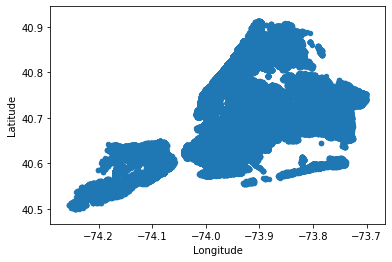

In [4]:
NYcrime.plot.scatter('Longitude', 'Latitude')

In [5]:
NYcrime2=NYcrime.groupby(['CMPLNT_FR_DT'])
NYcrime2

In [6]:
NYcrime2=NYcrime.groupby(['CMPLNT_FR_DT']).size().reset_index(name='counts')

In [7]:
NYcrime2

,CMPLNT_FR_DT,counts
0,01/01/1978,1
1,01/01/1983,1
2,01/01/1985,1
3,01/01/1986,1
4,01/01/1988,1
...,...,...
1512,12/31/2011,1
1513,12/31/2012,2
1514,12/31/2013,2
1515,12/31/2014,1


In [8]:
NYcrime2.sort_values(by=['counts'], ascending=False)

,CMPLNT_FR_DT,counts
25,01/01/2016,2077
665,06/01/2016,1731
393,04/01/2016,1728
803,07/01/2016,1536
274,03/01/2016,1503
...,...,...
835,07/09/2001,1
836,07/09/2010,1
105,01/21/2014,1
840,07/10/1999,1


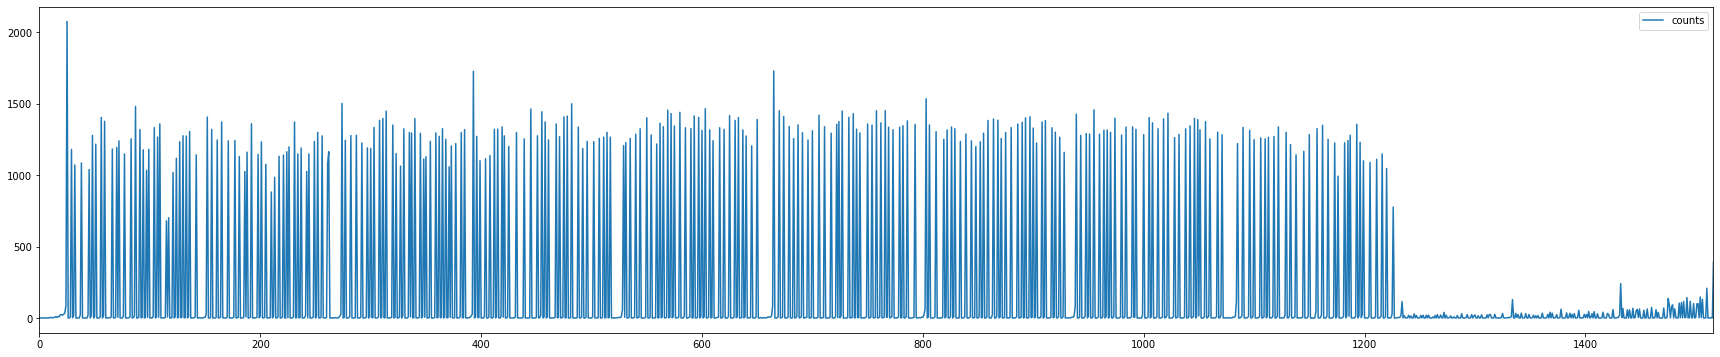

In [9]:
plt.rcParams['figure.figsize'] = (30,6)

NYcrime2.plot()

In [10]:
NYcrime2['YEAR'] = NYcrime2.CMPLNT_FR_DT.str[-4:]

In [11]:
NYcrime2

,CMPLNT_FR_DT,counts,YEAR
0,01/01/1978,1,1978
1,01/01/1983,1,1983
2,01/01/1985,1,1985
3,01/01/1986,1,1986
4,01/01/1988,1,1988
...,...,...,...
1512,12/31/2011,1,2011
1513,12/31/2012,2,2012
1514,12/31/2013,2,2013
1515,12/31/2014,1,2014


In [12]:
NYcrime2['YEAR'] = pd.to_numeric(NYcrime2['YEAR']) 

In [13]:
NYcrime2

,CMPLNT_FR_DT,counts,YEAR
0,01/01/1978,1,1978
1,01/01/1983,1,1983
2,01/01/1985,1,1985
3,01/01/1986,1,1986
4,01/01/1988,1,1988
...,...,...,...
1512,12/31/2011,1,2011
1513,12/31/2012,2,2012
1514,12/31/2013,2,2013
1515,12/31/2014,1,2014


In [14]:
NYcrime3 = NYcrime2[NYcrime2.YEAR >= 2016]

In [15]:
NYcrime3

,CMPLNT_FR_DT,counts,YEAR
25,01/01/2016,2077,2016
29,01/02/2016,1181,2016
32,01/03/2016,1072,2016
38,01/04/2016,1086,2016
45,01/05/2016,1040,2016
...,...,...,...
1205,09/26/2016,1090,2016
1211,09/27/2016,1112,2016
1216,09/28/2016,1149,2016
1220,09/29/2016,1048,2016


In [16]:
NYcrime3['Datetime'] = pd.to_datetime(NYcrime3['CMPLNT_FR_DT'])

C:\Users\casti\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
NYcrime3

,CMPLNT_FR_DT,counts,YEAR,Datetime
25,01/01/2016,2077,2016,2016-01-01
29,01/02/2016,1181,2016,2016-01-02
32,01/03/2016,1072,2016,2016-01-03
38,01/04/2016,1086,2016,2016-01-04
45,01/05/2016,1040,2016,2016-01-05
...,...,...,...,...
1205,09/26/2016,1090,2016,2016-09-26
1211,09/27/2016,1112,2016,2016-09-27
1216,09/28/2016,1149,2016,2016-09-28
1220,09/29/2016,1048,2016,2016-09-29


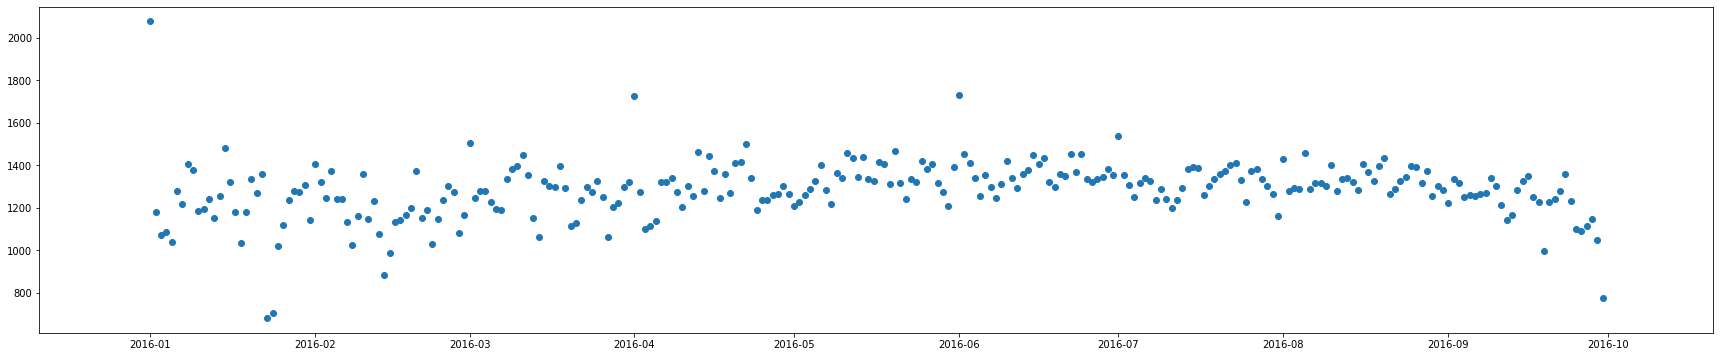

In [18]:
plt.scatter(NYcrime3['Datetime'], NYcrime3['counts'])

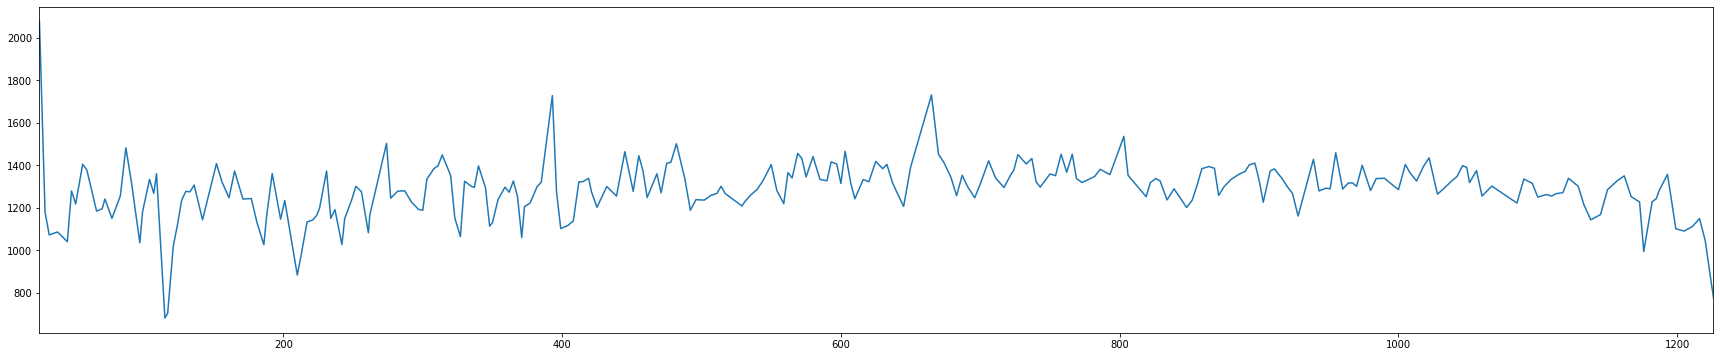

In [19]:
NYcrime3['counts'].plot()

In [20]:
NYcrime3

,CMPLNT_FR_DT,counts,YEAR,Datetime
25,01/01/2016,2077,2016,2016-01-01
29,01/02/2016,1181,2016,2016-01-02
32,01/03/2016,1072,2016,2016-01-03
38,01/04/2016,1086,2016,2016-01-04
45,01/05/2016,1040,2016,2016-01-05
...,...,...,...,...
1205,09/26/2016,1090,2016,2016-09-26
1211,09/27/2016,1112,2016,2016-09-27
1216,09/28/2016,1149,2016,2016-09-28
1220,09/29/2016,1048,2016,2016-09-29


In [21]:
NYcrime4 = NYcrime3[['Datetime','counts']]

In [22]:
NYcrime4

,Datetime,counts
25,2016-01-01,2077
29,2016-01-02,1181
32,2016-01-03,1072
38,2016-01-04,1086
45,2016-01-05,1040
...,...,...
1205,2016-09-26,1090
1211,2016-09-27,1112
1216,2016-09-28,1149
1220,2016-09-29,1048


In [23]:
NYcrime5=NYcrime4.reset_index()

In [24]:
NYcrime5

,index,Datetime,counts
0,25,2016-01-01,2077
1,29,2016-01-02,1181
2,32,2016-01-03,1072
3,38,2016-01-04,1086
4,45,2016-01-05,1040
...,...,...,...
269,1205,2016-09-26,1090
270,1211,2016-09-27,1112
271,1216,2016-09-28,1149
272,1220,2016-09-29,1048


In [25]:
NYcrime5=NYcrime5.drop(['index'], axis=1)

In [26]:
NYcrime5

,Datetime,counts
0,2016-01-01,2077
1,2016-01-02,1181
2,2016-01-03,1072
3,2016-01-04,1086
4,2016-01-05,1040
...,...,...
269,2016-09-26,1090
270,2016-09-27,1112
271,2016-09-28,1149
272,2016-09-29,1048


In [27]:
y_train_NYcrime = NYcrime5[NYcrime5.index < 243].counts
y_test_NYcrime = NYcrime5[NYcrime5.index >= 243].counts

len(y_train_NYcrime), len(y_test_NYcrime)

(243, 31)

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Figure(2160x432)


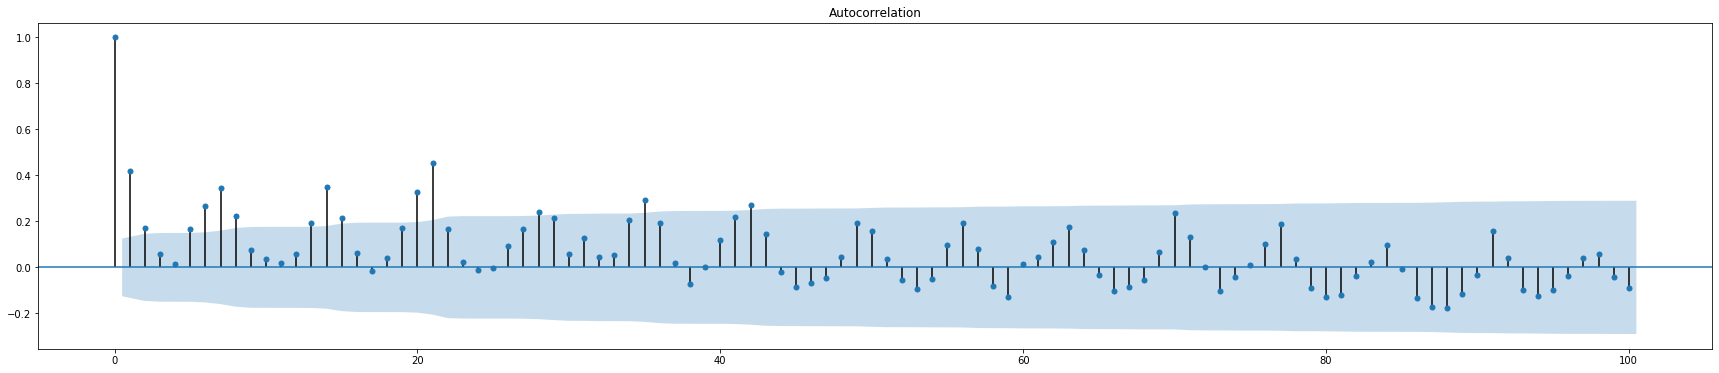

In [29]:
print(plot_acf(y_train_NYcrime, lags=100)) #correlation between current observation yt and plag (yt -t) observation

Figure(2160x432)


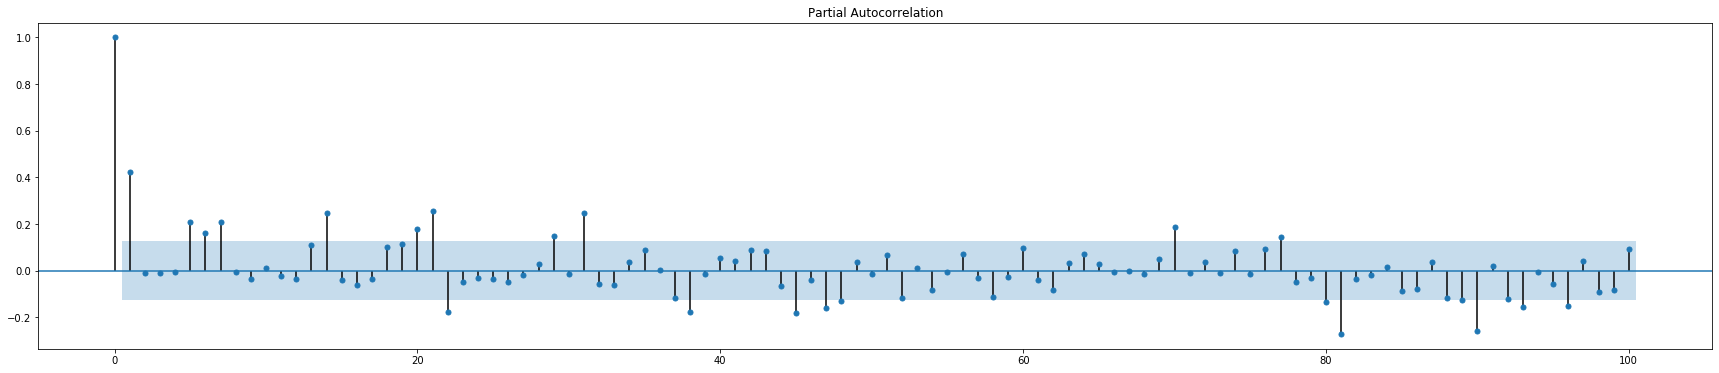

In [30]:
print(plot_pacf(y_train_NYcrime, lags=100)) #correlation between current observation yt and plag (yt -t) observation controlling for correlations of all other lags

In [31]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.model_selection import TimeSeriesSplit

In [32]:
# Fit the model
ar_NYcrime = AutoReg(y_train_NYcrime, lags=100)
res_NYcrime = ar_NYcrime.fit()
print(res_NYcrime.summary())

                            AutoReg Model Results                             
Dep. Variable:                 counts   No. Observations:                  243
Model:                   AutoReg(100)   Log Likelihood                -706.333
Method:               Conditional MLE   S.D. of innovations             33.800
Date:                Wed, 29 Apr 2020   AIC                              8.467
Time:                        15:18:00   BIC                             10.581
Sample:                           100   HQIC                             9.326
                                  243                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept     807.0934    247.117      3.266      0.001     322.753    1291.434
counts.L1       0.0753      0.083      0.908      0.364      -0.087       0.238
counts.L2       0.1534      0.083      1.848    

In [33]:
parameters = res_NYcrime.params

In [34]:
parameters

intercept      807.093379
counts.L1        0.075300
counts.L2        0.153385
counts.L3       -0.044620
counts.L4        0.032773
                  ...    
counts.L96      -0.209133
counts.L97       0.083233
counts.L98       0.088693
counts.L99      -0.035379
counts.L100     -0.071369
Length: 101, dtype: float64

In [35]:
predictions = []

# create a loop to predict the value for every timestep in y_test
for i in range(len(y_train_NYcrime), len(NYcrime5)):
    predictions.append(parameters[0] + sum(NYcrime5.counts[i-1:i].values * NYcrime5.counts[:0:-1].values))

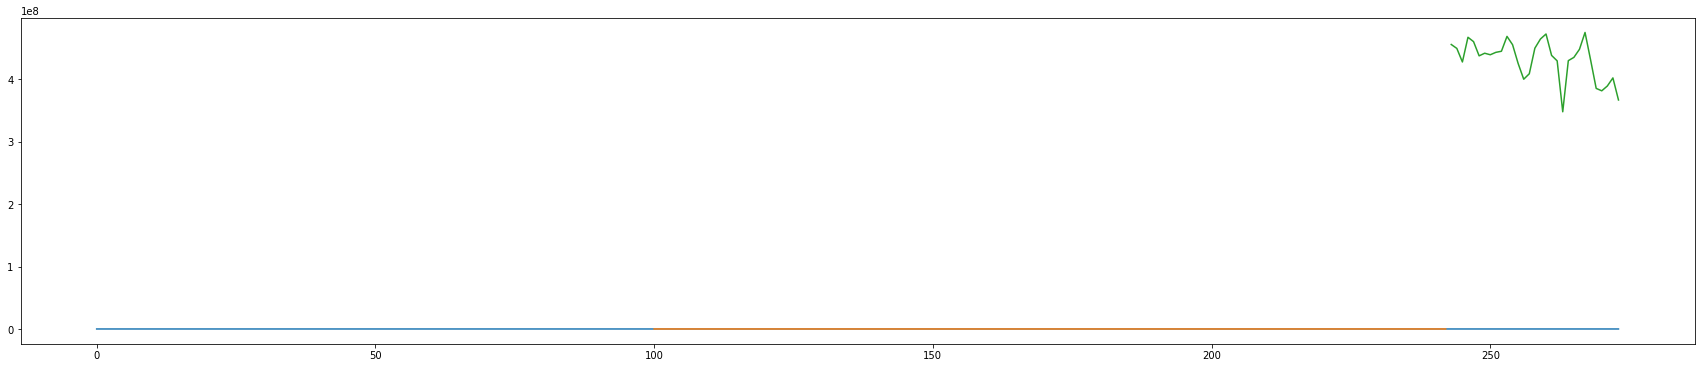

In [36]:
plt.plot(NYcrime5.counts, label='y')
plt.plot(res_NYcrime.predict(), label='in_sample')
plt.plot(y_test_NYcrime.index, predictions, label='out_of_sample')

Figure(2160x432)


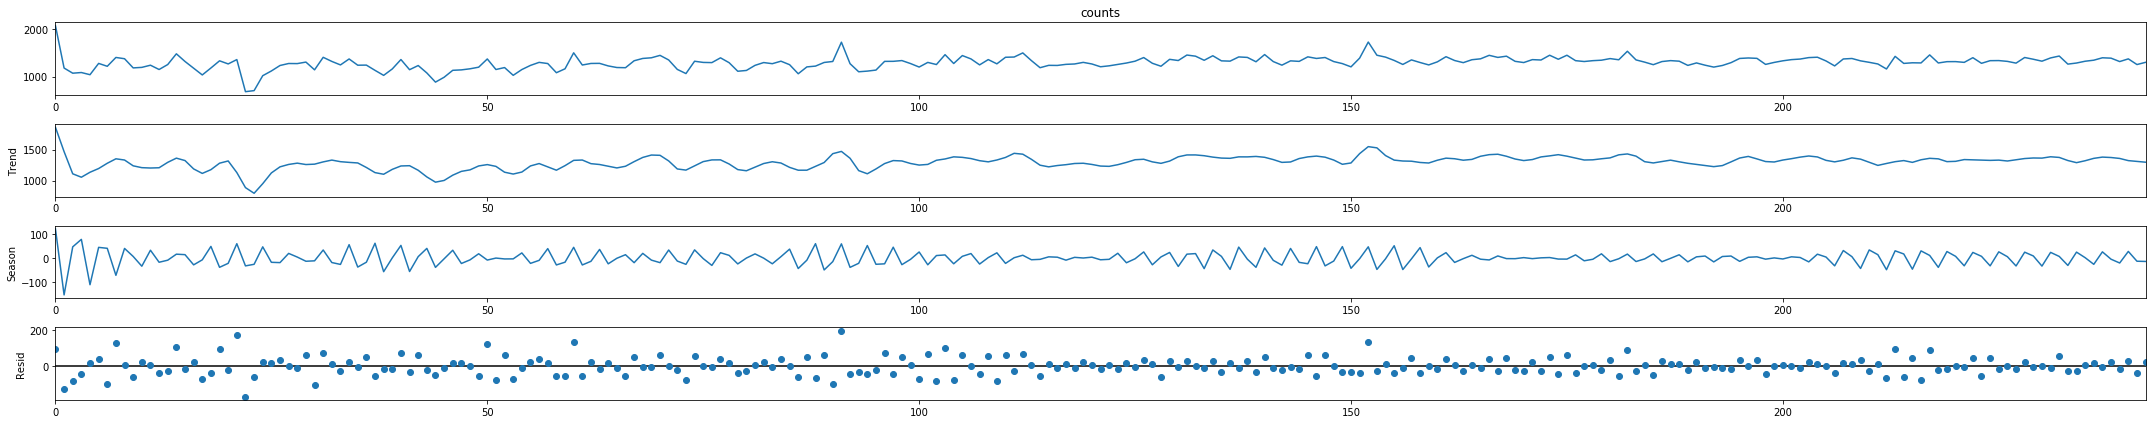

In [37]:
from statsmodels.tsa.seasonal import STL

decompose = STL(y_train_NYcrime, period=3, seasonal=9)
decompose = decompose.fit()
print(decompose.plot())

Figure(2160x432)


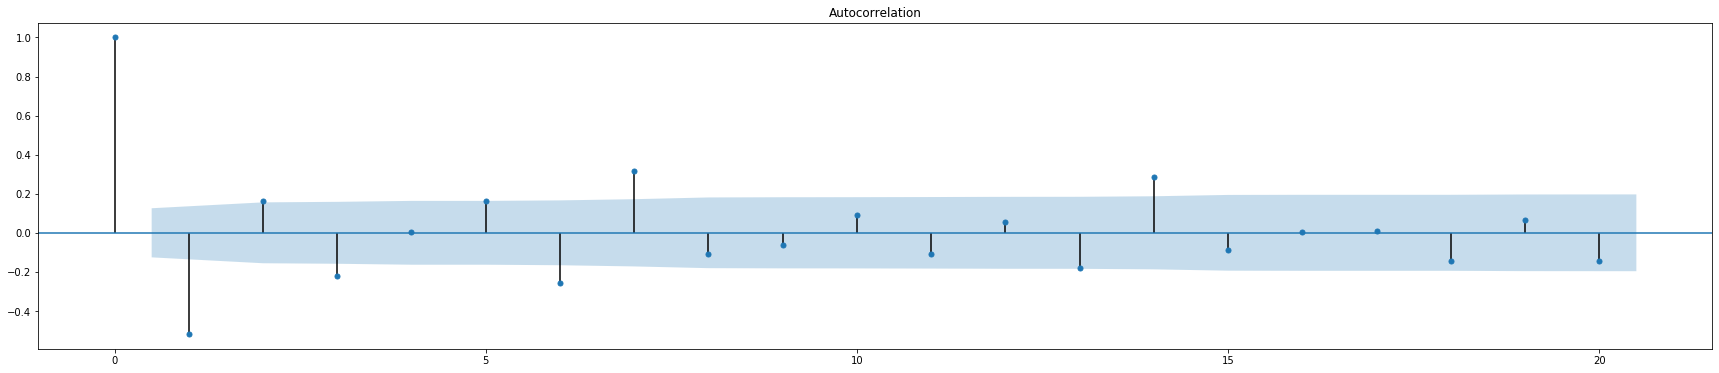

In [38]:
series = decompose.resid
print(plot_acf(series, lags=20))

Figure(2160x432)


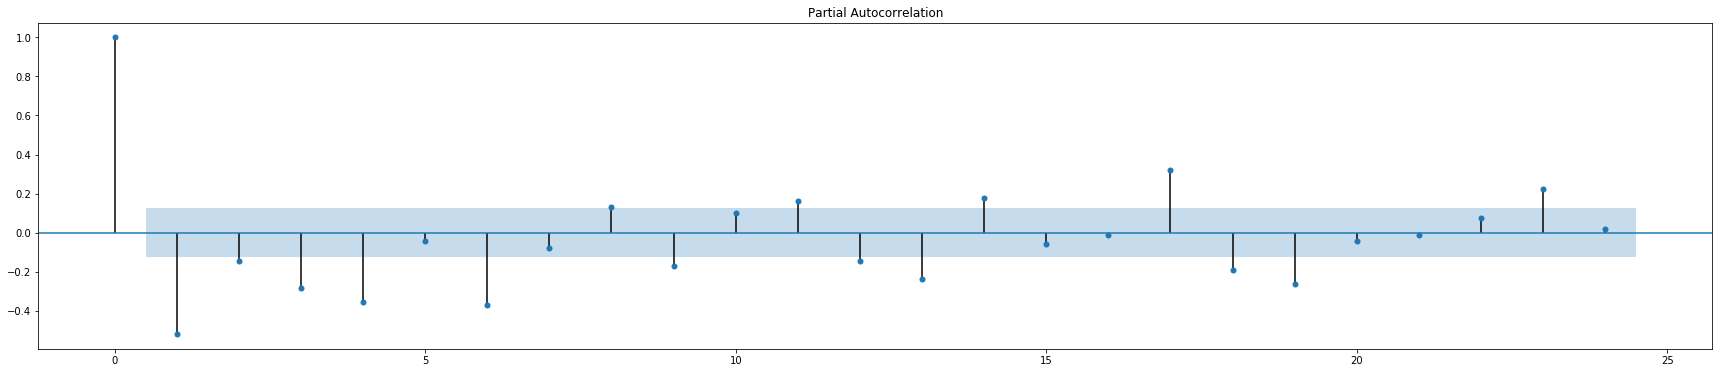

In [39]:
print(plot_pacf(series))

In [40]:
series_model = AutoReg(series, lags=100)
res_fl = series_model.fit()
print(res_fl.summary())

                            AutoReg Model Results                             
Dep. Variable:                  resid   No. Observations:                  243
Model:                   AutoReg(100)   Log Likelihood                -487.129
Method:               Conditional MLE   S.D. of innovations              7.298
Date:                Wed, 29 Apr 2020   AIC                              5.402
Time:                        15:18:01   BIC                              7.515
Sample:                           100   HQIC                             6.260
                                  243                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2294      0.740      0.310      0.756      -1.220       1.679
resid.L1      -1.4351      0.081    -17.655      0.000      -1.594      -1.276
resid.L2      -1.5499      0.147    -10.513      0.0

In [41]:
pr = res_fl.fittedvalues + decompose.seasonal + decompose.trend

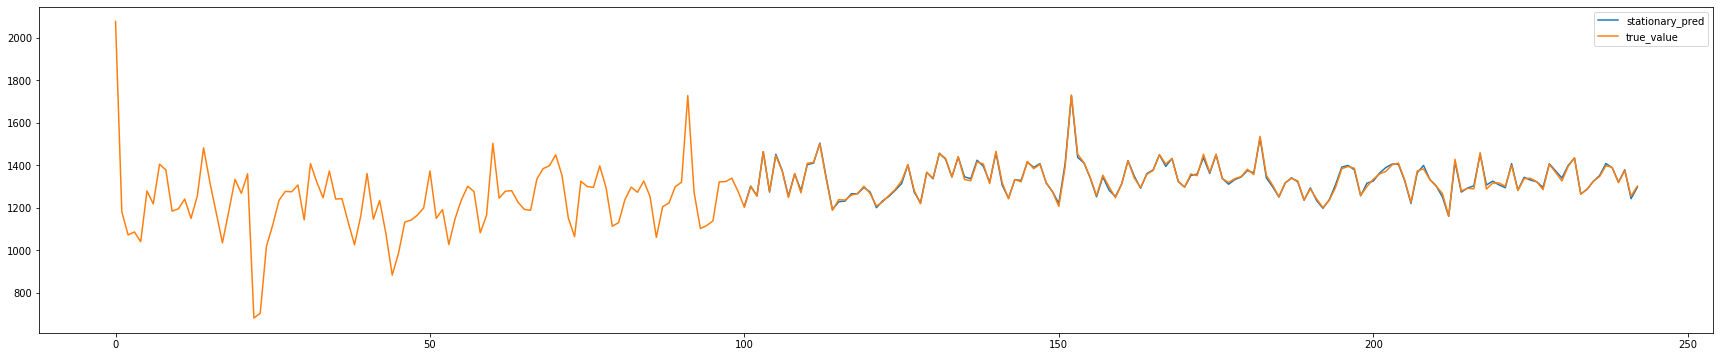

In [42]:
plt.plot(pr, label='stationary_pred')
plt.plot(y_train_NYcrime, label='true_value')
#plt.plot(res_NYcrime.predict(), label='non-stationary')
plt.legend()

In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
y_train_NYcrime

0      2077
1      1181
2      1072
3      1086
4      1040
       ... 
238    1390
239    1318
240    1375
241    1255
242    1302
Name: counts, Length: 243, dtype: int64

In [45]:
res_NYcrime.predict()[100:]

100    1240.002151
101    1293.535655
102    1272.653194
103    1442.317008
104    1318.793261
          ...     
238    1343.344287
239    1300.052622
240    1390.731845
241    1240.913639
242    1308.634498
Length: 143, dtype: float64

In [46]:
# Compare the mean_squared_error of the two approaches
print(f'Stationarized time series: {mean_squared_error(y_train_NYcrime[240:], pr[240:])}')
print(f'Non-Stationarized time series: {mean_squared_error(y_train_NYcrime[240:], res_NYcrime.predict()[240:])}')

Stationarized time series: 67.08685722874601
Non-Stationarized time series: 163.31102505951503


In [47]:
print(pr)

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
          ...     
238    1388.186224
239    1320.196756
240    1378.827574
241    1242.360202
242    1296.818710
Length: 243, dtype: float64


In [48]:
print(y_train_NYcrime)

0      2077
1      1181
2      1072
3      1086
4      1040
       ... 
238    1390
239    1318
240    1375
241    1255
242    1302
Name: counts, Length: 243, dtype: int64


In [49]:
print(res_NYcrime.predict())

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
          ...     
238    1343.344287
239    1300.052622
240    1390.731845
241    1240.913639
242    1308.634498
Length: 243, dtype: float64
